## Что такое большие данные и почему для работы с ними нужны отдельные подходы.

*В Одноклассниках большие данные и размер кластера исчисляется сотнями петабайт.* 

### **Big Data** это:

- __Сами массивы данных.__
- __Инструменты.__ Метатермин в наше время, не относится к самим данным.
- __Подходы и методы их обработки.__

**Любое использование больших данных** — это:

1. Дорого.
2. Должно себя окупать

##Методика работы с BigData
__Работу выполнили:__

1. Алсу Бадртдинова
2. Лия Камалова
3. Ильзира Ахметдинова

__Верхнеуровневый план работы:__

* Опишем методику работы с Big data с помощью Spark и объясним необходимость существования подобных инструментов. 
* Возможности Spark в генерации данных с использованием библиотеки dbldatagen. 
* Рассмотрим операции парсинга, конкатенции, поиска, фильтрации.
* Оценим временную сложность основных операций. 

## DASK


Dask — это библиотека анализа данных с обеспечением параллельных вычислений и масштабируемой производительностью, а также с интеграцией с другими Python-инструментами: Numpy, Pandas и Scikit-learn. Библиотека имеет в основе существующие API-интерфейсы на Python и структуры данных, чтобы упростить переключение между библиотеками.

Датафреймы Dask не полностью совместимы с Pandas, но некоторые наиболее распространенные операции обработки данных всё же поддерживаются обоими библиотеками. Dask больше ориентирован на масштабирование с вычислениями на кластерах.


In [ ]:
pip install "dask[complete]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 837 kB 5.3 MB/s 
     |████████████████████████████████| 140 kB 38.4 MB/s 
     |████████████████████████████████| 830 kB 23.1 MB/s 
     |████████████████████████████████| 822 kB 26.4 MB/s 
     |████████████████████████████████| 802 kB 47.8 MB/s 
     |████████████████████████████████| 802 kB 50.3 MB/s 
     |████████████████████████████████| 793 kB 47.3 MB/s 
     |████████████████████████████████| 793 kB 52.7 MB/s 
     |████████████████████████████████| 791 kB 50.8 MB/s 
     |████████████████████████████████| 786 kB 60.8 MB/s 
     |████████████████████████████████| 779 kB 58.4 MB/s 
     |████████████████████████████████| 778 kB 59.1 MB/s 
     |████████████████████████████████| 776 kB 53.8 MB/s 
     |████████████████████████████████| 769 kB 52.1 MB/s 
     |████████████████████████████████| 766 kB 46.9 MB/s 
     |██████████████████████████

In [ ]:
pip install dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Dask Array работает с очень большими массивами, разделяя их на куски и выполняя эти блоки параллельно. 

Dask Array может читать из любого массива

In [ ]:
import pandas as pd
import glob
import dask.dataframe as dd

Граф выполнения Dask при чтении нескольких файлов

Датафрейм Dask состоит из нескольких датафреймов pandas, которые разделены по индексам. Когда мы выполняем функцию read_csv из Dask, выполняется чтение одного и того же файла несколькими процессами.


Чтение CSV-файлов

ЕСли есть много CSV-файлов , мы  можем прочитать их все как один логический кадр данных, используя dd.read_csv функцию со строкой glob.

Мы можем прочитать один файл с помощью pandas.read_csv или несколько файлов с помощьюdask.dataframe.read_csv

Читать с Паркета


Всякий раз, когда мы работаем с нашим фреймом данных, мы читаем все наши данные CSV, чтобы не заполнять ОЗУ. Это очень эффективно для использования памяти, но чтение всех файлов CSV каждый раз может быть медленным.

Вместо этого можно хранить наши данные в формате Parquet, который более эффективен для компьютеров при чтении и записи.


Parquet — это хранилище столбцов, что означает, что он может эффективно извлекать только несколько столбцов из вашего набора данных. Это хорошо, потому что помогает избежать ненужной загрузки данных.

In [ ]:
!python -m pip install "dask[complete]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import json
from pandas import json_normalize

###Парсинг данных


In [ ]:
import dask.dataframe as dd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving airport-codes.csv to airport-codes (1).csv


In [ ]:
data = pd.read_csv('/content/airport-codes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57421 entries, 0 to 57420
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ident         57421 non-null  object 
 1   type          57421 non-null  object 
 2   name          57421 non-null  object 
 3   elevation_ft  49608 non-null  float64
 4   continent     28978 non-null  object 
 5   iso_country   57175 non-null  object 
 6   iso_region    57421 non-null  object 
 7   municipality  51527 non-null  object 
 8   gps_code      41561 non-null  object 
 9   iata_code     9225 non-null   object 
 10  local_code    30030 non-null  object 
 11  coordinates   57421 non-null  object 
dtypes: float64(1), object(11)
memory usage: 5.3+ MB


In [ ]:
data.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [ ]:
data.tail()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
57416,ZYYK,medium_airport,Yingkou Lanqi Airport,0.0,AS,CN,CN-21,Yingkou,ZYYK,YKH,NaN,"122.3586, 40.542524"
57417,ZYYY,medium_airport,Shenyang Dongta Airport,NaN,AS,CN,CN-21,Shenyang,ZYYY,NaN,NaN,"123.49600219726562, 41.784400939941406"
57418,ZZ-0001,heliport,Sealand Helipad,40.0,EU,GB,GB-ENG,Sealand,NaN,NaN,NaN,"1.4825, 51.894444"
57419,ZZ-0002,small_airport,Glorioso Islands Airstrip,11.0,AF,TF,TF-U-A,Grande Glorieuse,NaN,NaN,NaN,"47.296388888900005, -11.584277777799999"
57420,ZZZZ,small_airport,Satsuma IÅjima Airport,338.0,AS,JP,JP-46,Mishima-Mura,RJX7,NaN,RJX7,"130.270556, 30.784722"


In [ ]:
data.to_parquet('11.parquet', engine='pyarrow')

In [ ]:
df = dd.read_parquet('11.parquet', columns=['name', 'coordinates'], engine='pyarrow')
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 2 entries, name to coordinates
dtypes: object(2)

In [ ]:
df.head()

,name,coordinates
0,Total Rf Heliport,"-74.93360137939453, 40.07080078125"
1,Aero B Ranch Airport,"-101.473911, 38.704022"
2,Lowell Field,"-151.695999146, 59.94919968"
3,Epps Airpark,"-86.77030181884766, 34.86479949951172"
4,Newport Hospital & Clinic Heliport,"-91.254898, 35.6087"


In [ ]:
df.tail()

,name,coordinates
57416,Yingkou Lanqi Airport,"122.3586, 40.542524"
57417,Shenyang Dongta Airport,"123.49600219726562, 41.784400939941406"
57418,Sealand Helipad,"1.4825, 51.894444"
57419,Glorioso Islands Airstrip,"47.296388888900005, -11.584277777799999"
57420,Satsuma IÅjima Airport,"130.270556, 30.784722"


In [ ]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 2 entries, name to coordinates
dtypes: object(2)

In [ ]:
from math import isnan

In [ ]:
data = dd.read_csv('/content/airport-codes.csv')

### Конкатенация


In [ ]:
df1 = dd.concat([df, data], axis=1)

/usr/local/lib/python3.7/dist-packages/dask/dataframe/multi.py:1056: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indexes of each dataframes are 
 aligned. This assumption is not generally safe.
  "Concatenating dataframes with unknown divisions.\n"


In [ ]:
df1.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 14 entries, name to coordinates
dtypes: object(13), float64(1)

In [ ]:
df1.head()

,name,coordinates,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,Total Rf Heliport,"-74.93360137939453, 40.07080078125",00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,Aero B Ranch Airport,"-101.473911, 38.704022",00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,Lowell Field,"-151.695999146, 59.94919968",00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,Epps Airpark,"-86.77030181884766, 34.86479949951172",00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,Newport Hospital & Clinic Heliport,"-91.254898, 35.6087",00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


Для удобства заполним пропуски нулями

In [ ]:
data2= df1.fillna(0)

In [ ]:
data2.head()

,name,coordinates,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,Total Rf Heliport,"-74.93360137939453, 40.07080078125",00A,heliport,Total Rf Heliport,11.0,0,US,US-PA,Bensalem,00A,0,00A,"-74.93360137939453, 40.07080078125"
1,Aero B Ranch Airport,"-101.473911, 38.704022",00AA,small_airport,Aero B Ranch Airport,3435.0,0,US,US-KS,Leoti,00AA,0,00AA,"-101.473911, 38.704022"
2,Lowell Field,"-151.695999146, 59.94919968",00AK,small_airport,Lowell Field,450.0,0,US,US-AK,Anchor Point,00AK,0,00AK,"-151.695999146, 59.94919968"
3,Epps Airpark,"-86.77030181884766, 34.86479949951172",00AL,small_airport,Epps Airpark,820.0,0,US,US-AL,Harvest,00AL,0,00AL,"-86.77030181884766, 34.86479949951172"
4,Newport Hospital & Clinic Heliport,"-91.254898, 35.6087",00AR,closed,Newport Hospital & Clinic Heliport,237.0,0,US,US-AR,Newport,0,0,0,"-91.254898, 35.6087"


###Фильтрация

In [ ]:
continent = data[data['continent']=='EU']

In [ ]:
continent[['name', 'continent']].head()

,name,continent
10422,RAF Calveley,EU
10423,RNAS/RAF Calshot,EU
10426,CamÃ­ Heliport,EU
10427,Andorra la Vella Heliport,EU
10429,RAF Castletown,EU


In [ ]:
!pip install dask-searchcv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 3.6 MB/s 


In [ ]:
columns1 = ['heliport', 'small_airport']

In [ ]:
data.groupby(['iso_country', 'type']).size()

Dask Series Structure:
npartitions=1
    int64
      ...
dtype: int64
Dask Name: dataframe-groupby-size-agg, 5 tasks

In [ ]:
ddf_selected = data.loc[data['type']]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np
import pandas.tseries
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


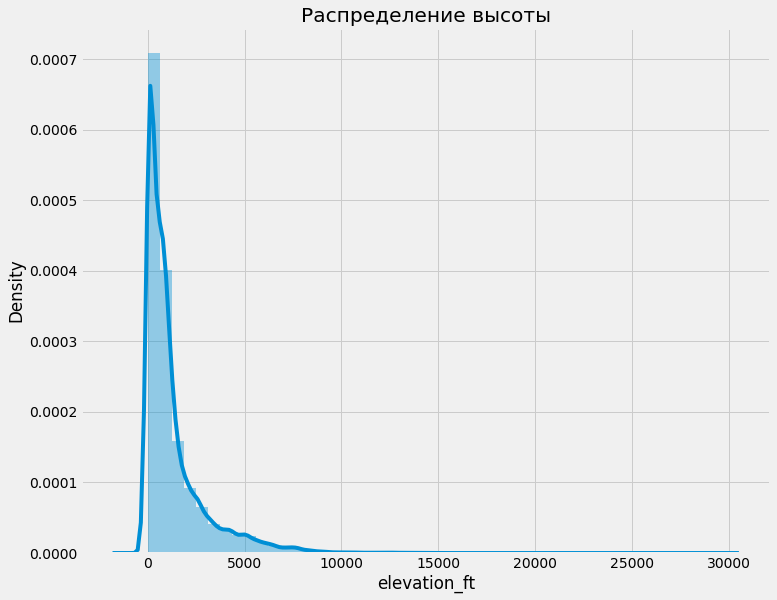

In [ ]:
f, ax = plt.subplots(figsize =(11,9))
plt.title("Распределение высоты")
sns.distplot(data.elevation_ft)
plt.show()

# __Spark for Big Data. Introduction__



**Spark** —  современный и высокоуровневый инструмент для обработки больших массивов информации. Самый распространённый фреймворк для работы с ML на больших данных и расчетов на них. 

- Индустриальный стандарт.
- Под капотом **Spark** написан на Scala, поэтому через *Scala вызовы* на него самый богатый доступ к **API**.
- __Scala__ - это JVM friendly язык, поэтому вся логика Spark будет транслироваться в поток байт для JVM.
- В питоновских структурах данных есть проблемы, так как Python медленнее Scala. Scala в некоторых тестах может быть в несколько раз или на порядки быстрее Python. Есть бенчмарки, оформленные в виде статей от Димы Бугайченко.
- **PySpark** хватает для 90 процентов задач, остальные 10 процентов будут не так эффективны, но даже они не сильно критичны для маленьких кластеров.

__Полезные ссылки по Spark:__

* [RDD Programming Guide](https://spark.apache.org/docs/latest/rdd-programming-guide.html)
* [PairRDDFunctions](https://spark.apache.org/docs/latest/api/scala/org/apache/spark/rdd/PairRDDFunctions.html)

__Документация по Spark:__

* PySpark: [https://spark.apache.org/docs/latest/api/python/index.html](https://spark.apache.org/docs/latest/api/python/index.html)

### Part 0. Load data, Import libs

__Импортируем необходимые библиотеки__

In [ ]:
import os

import pandas as pd

__Установим Spark в Google Colab__

In [ ]:
!apt-get install -q openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

!tar xvf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()

spark-3.2.1-bin-hadoop3.2/
spark-3.2.1-bin-hadoop3.2/LICENSE
spark-3.2.1-bin-hadoop3.2/NOTICE
spark-3.2.1-bin-hadoop3.2/R/
spark-3.2.1-bin-hadoop3.2/R/lib/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/DESCRIPTION
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/INDEX
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/Rd.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/features.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/hsearch.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/links.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/nsInfo.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/package.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/vignette.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/NAMESPACE
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR.rdb
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR.rdx
spark-3.2.1-bin-hadoop3.2/R/lib/Sp

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 26 kB/s 
     |████████████████████████████████| 198 kB 36.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=b1e7f96d393aff3796a8634516eac1643f8b157384416362bb1d7750e98b9277
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


Откроем Spark сессию

In [ ]:
from pyspark.sql import SparkSession


spark = (
    SparkSession
    .builder
    .appName("Python Spark basic example")
    .getOrCreate()
)

### Part II. Spark for Big Data

__Полезные практики в Spark:__

* Полезно обратить внимание на функции из **pyspark.sql.functions**. У Spark'а большой набор встроенных функций. Перед тем, как написать свою пользовательскую функцию через lambda (используется в коде в духе .map(lambda x: <some logic>)), лучше поискать функции в **pyspark.sql.functions** и на их основе попытаться скомбинировать свою. Даже если для этого потребуется 5-6 функций для создания своей логики - это будет все равно быстрее, чем если писать функцию на Python. Так как будет тратиться время на се(-де)риализацию в JVM.
* В Spark много встроенных методов для работы со словарями, списками и в целом со структурами данных. Многое из них лежит в pyspark.sql.functions


__RDD vs Spark Dataframe.__

* __RDD__ – это базовый концепт того, как работать с данными в Spark. По сути это логический план вычислений, который в конце транслируется в физический план запросы для выполнения в JVM.

* __Spark Dataframe__ – это структурированная колоночная структура данных. Может быть создана на основе:
    * локальной коллекции
    * файла (файлов)
    * базы данных
    * в python работает значительно быстрее, чем RDD
    * под капотом использует RDD
    * позволяет выполнять произвольные SQL операции с данными
    * аналогично RDD являются ленивыми и неизменяеыми


* Лучше всего работать в Spark с нативной конструкцией с популярным названием _Dataframe_. Они работают намного быстрее, чем RDD. 

### Part III. Spark in generating data

##Simple Example

In [ ]:
from pyspark.sql.functions import *

(
    spark.range(10)
    .withColumn("foo", expr(""" pmod(id, 3) """))
    .withColumn("random_uuid", expr("java_method('java.util.UUID', 'randomUUID')"))   
).show()

+---+---+--------------------+
| id|foo|         random_uuid|
+---+---+--------------------+
|  0|  0|5319958b-8be8-409...|
|  1|  1|9807035c-42f8-4a7...|
|  2|  2|d97c40fa-d2a2-46b...|
|  3|  0|78cf9272-e103-493...|
|  4|  1|ece23fd1-0b60-489...|
|  5|  2|c5298bc0-bd58-42a...|
|  6|  0|c5b2c356-b9f7-412...|
|  7|  1|f036e284-8a11-4b9...|
|  8|  2|5a4938e7-3060-4ca...|
|  9|  0|17f02a03-1d76-477...|
+---+---+--------------------+



#### Hard Example

__Synthetic Data Generation in Spark with dbldatagen__

В следующем примере показана генерация данных в Spark с помощью библиотеки Databricks Labs Data Generator ([dbldatagen](https://databrickslabs.github.io/dbldatagen/public_docs/APIDOCS.html)) от Databricks Labs
* синтетических имен
* адресов электронной почты
* использование SQL-выражения для вычисления MD5-хэшей гипотетической синтетической кредитной карты

Установим библиотеку dbldatagen

In [ ]:
!pip install git+https://github.com/databrickslabs/dbldatagen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/databrickslabs/dbldatagen to /tmp/pip-req-build-x0_w48t4
  Running command git clone -q https://github.com/databrickslabs/dbldatagen /tmp/pip-req-build-x0_w48t4
  Created wheel for dbldatagen: filename=dbldatagen-0.2.0rc1-py3-none-any.whl size=68973 sha256=f59dad52634bf1163159193b8736c979f0742887e46e8e1a3c5e7df7f0b97052
  Stored in directory: /tmp/pip-ephem-wheel-cache-jwau0thf/wheels/fa/2f/29/fd337c2f0a1da95c1069d7f4898c3ff5a0ea697cb5d31f319c
Successfully built dbldatagen


In [ ]:
import dbldatagen as dg

shuffle_partitions_requested = 8
partitions_requested = 8
data_rows = 10000000

spark.conf.set("spark.sql.shuffle.partitions", shuffle_partitions_requested)

dataspec = (
    dg.DataGenerator(spark, rows=data_rows, partitions=8, randomSeedMethod="hash_fieldname")
    .withColumn("name", percentNulls=0.01, template=r'\\w \\w|\\w a. \\w') 
    .withColumn("payment_instrument_type", values=['paypal', 'visa', 'mastercard', 'amex'], 
                random=True)             
    .withColumn("int_payment_instrument", "int",  minValue=0000, maxValue=9999,  
                baseColumn="name",
                baseColumnType="hash", omit=True)
    .withColumn("payment_instrument", 
                    expr="format_number(int_payment_instrument, '**** ****** *####')",
                    baseColumn="int_payment_instrument")
    .withColumn("email", template=r'\\w.\\w@\\w.com')       
    .withColumn("md5_payment_instrument", 
                expr="md5(concat(payment_instrument_type, ':', payment_instrument))",
                baseColumn=['payment_instrument_type', 'payment_instrument']) 
)
df1 = dataspec.build()

INFO: Version : VersionInfo(major='0', minor='2', patch='0', release='rc', build='1')


In [ ]:
df1.show()

+--------------------+-----------------------+------------------+--------------------+----------------------+
|                name|payment_instrument_type|payment_instrument|               email|md5_payment_instrument|
+--------------------+-----------------------+------------------+--------------------+----------------------+
|          laboris ut|                   visa| **** ****** *6187|   qui.enim@esse.com|  56a8392f6ea841439...|
|     exercitation in|             mastercard| **** ****** *7390|occaecat.quis@iru...|  56cb6c943fdd51a0a...|
|         tempor esse|                 paypal| **** ****** *3256|   sunt.dolor@ut.com|  7149ba8873f8e092e...|
|veniam l. consect...|                 paypal| **** ****** *6949|laborum.laborum@q...|  e6008d9e735094d07...|
|     incididunt nisi|                   visa| **** ****** *3300|dolore.ipsum@veli...|  30ac2f3a589c42061...|
|      cillum ullamco|                   visa| **** ****** *8669|mollit.in@laborum...|  4bc3bce50fca2ba6a...|
|         

### Part IV: Spark for Data Analysis

* Рассмотрим операции парсинга, конкатенции, поиска, фильтрации.
* Оценим временную сложность основных операций.


Для исследования возьмем данные об аэропортах

In [ ]:
# Лучше выполнять через Google Chrome

# from google.colab import files
# uploaded = files.upload()
# for fn in uploaded.keys():
#    print('User uploaded file «{name}» with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [ ]:
DATA_PATH = "airport-codes.csv"

Spark может считать файлы разных форматов. Вот их неполный список:

Файлы:
* json
* text
* csv
* parquet

Также может считать из разных баз данных и брокеров сообщений.

Считаем csv-данные

In [ ]:
df = spark.read.format("csv").options(header=True, inferSchema=True).load(DATA_PATH)

Выведем первые 5 строк и схему датафрейма

In [ ]:
df.show(5)
df.printSchema()

+-----+-------------+--------------------+------------+---------+-----------+----------+------------+--------+---------+----------+--------------------+
|ident|         type|                name|elevation_ft|continent|iso_country|iso_region|municipality|gps_code|iata_code|local_code|         coordinates|
+-----+-------------+--------------------+------------+---------+-----------+----------+------------+--------+---------+----------+--------------------+
|  00A|     heliport|   Total Rf Heliport|          11|       NA|         US|     US-PA|    Bensalem|     00A|     null|       00A|-74.9336013793945...|
| 00AA|small_airport|Aero B Ranch Airport|        3435|       NA|         US|     US-KS|       Leoti|    00AA|     null|      00AA|-101.473911, 38.7...|
| 00AK|small_airport|        Lowell Field|         450|       NA|         US|     US-AK|Anchor Point|    00AK|     null|      00AK|-151.695999146, 5...|
| 00AL|small_airport|        Epps Airpark|         820|       NA|         US|     

Чтобы при каждой новой операции (actions в Spark) не вычислялось всё заново, неоходимо использовать __кэширование__. Если этого не сделать, то при каждой новой операции с ним он пересчитывается при вызове каждого действия.

Есть методы __cache__ и __persist__. Они сохраняют состояние графа (плана вычислений) после первого действия. И следующие просто обращаются к нему. 
persist дает выбрать, куда сохранить данные, а cache использует значение по умолчанию (зависит от версии Spark что берется по умолчанию). В текущей версии Spark это [StorageLevel.MEMORY_ONLY](https://spark.apache.org/docs/latest/rdd-programming-guide.html#rdd-persistence)

In [ ]:
df.cache()
print("count:", df.count())

count: 57421


Все возможности Spark для чтения есть и для записи. Давайте поэксперементируем с сохранением в разных форматах. Например, __parquet__.

In [ ]:
!pip install pyspark.sql.functions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pyspark.sql.functions (from versions: none)
ERROR: No matching distribution found for pyspark.sql.functions


In [ ]:
from pyspark.sql import *

In [ ]:
!pip install git+https://github.com/jkbr/httpie.git#egg=httpie

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/jkbr/httpie.git to /tmp/pip-install-ynbyezv_/httpie_f96dfc38dd3d4b1980fef228fedbc062
  Running command git clone -q https://github.com/jkbr/httpie.git /tmp/pip-install-ynbyezv_/httpie_f96dfc38dd3d4b1980fef228fedbc062
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 94 kB 2.7 MB/s 
     |████████████████████████████████| 232 kB 43.3 MB/s 
     |████████████████████████████████| 51 kB 4.1 MB/s 
  Created wheel for httpie: filename=httpie-3.2.1-py3-none-any.whl size=125037 sha256=3eade0d7ac083f27cade0b738c7124d9f15306914ad67e163792f34a203fe121
  Stored in directory: /tmp/pip-ephem-wheel-cache-ci0wftx2/wheels/aa/0b/c1/46ad6a9f541947b36054d3947824c7d3965d2e2e96290acfe0
Successfully built httpie


In [ ]:
!pip install apache-age-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement apache-age-python (from versions: none)
ERROR: No matching distribution found for apache-age-python


In [ ]:
condition = col("continent") != "n/a"

df \
    .filter(condition) \
    .write \
    .format("parquet") \
    .mode("overwrite") \
    .save("/tmp/agg0.parquet")

print("Ok! Data is written to {}".format("/tmp/agg0.parquet"))

Ok! Data is written to /tmp/agg0.parquet


####Фильтрация

Метод filter позволяет фильтровать датасет:

In [ ]:
%%time
df.filter(col("continent") == "EU").show(10, False)

+-------+--------+-------------------------+------------+---------+-----------+----------+----------------+--------+---------+----------+----------------------------------+
|ident  |type    |name                     |elevation_ft|continent|iso_country|iso_region|municipality    |gps_code|iata_code|local_code|coordinates                       |
+-------+--------+-------------------------+------------+---------+-----------+----------+----------------+--------+---------+----------+----------------------------------+
|ABE    |closed  |RAF Calveley             |null        |EU       |GB         |GB-ENG    |Cheshire        |null    |null     |null      |-2.603889, 53.113333              |
|ABL    |closed  |RNAS/RAF Calshot         |null        |EU       |GB         |GB-ENG    |Hampshire       |null    |null     |null      |-1.30677223206, 50.8199131549     |
|AD-0001|heliport|CamÃ­ Heliport           |null        |EU       |AD         |AD-04     |La Massana      |null    |null     |null     

Подготровим датафрейм с очищенными данными

In [ ]:
%%time
from pyspark.sql.functions import col

fill_dict = {'continent': 'n/a', 'iata_code': 'n/a'}
replace_dict = {"Rossiya": "Russia", "NA": "n/a"}

clean_data = (
    df.dropDuplicates()
    .na.drop("all")
    .na.fill(fill_dict)
    .na.replace(replace_dict)
    .select(col("continent"), col("name"), col("iso_country"))
)

CPU times: user 15.5 ms, sys: 1.2 ms, total: 16.7 ms
Wall time: 303 ms


In [ ]:
clean_data.show(5)

+---------+--------------------+-----------+
|continent|                name|iso_country|
+---------+--------------------+-----------+
|      n/a|    Caffrey Heliport|         US|
|      n/a|Bailey Generation...|         US|
|      n/a|      Hammer Airport|         US|
|      n/a|Ac & R Components...|         US|
|      n/a| Sands Ranch Airport|         US|
+---------+--------------------+-----------+
only showing top 5 rows



#### Группировки

In [ ]:
%%time
from pyspark.sql.functions import count, sum

agg = clean_data.groupBy("continent").agg(count("*"))
agg.show(10, False)

+---------+--------+
|continent|count(1)|
+---------+--------+
|EU       |8404    |
|SA       |8443    |
|AN       |28      |
|OC       |3123    |
|n/a      |28443   |
|AF       |3361    |
|AS       |5619    |
+---------+--------+

CPU times: user 23.1 ms, sys: 2.82 ms, total: 25.9 ms
Wall time: 1.9 s


#### Оконные функции

Оконные функции позволяют делать функции над "окнами" данных

In [ ]:
%%time
from pyspark.sql import Window
import pyspark.sql.functions as F

window = Window.partitionBy("continent")

agg = (
    clean_data
    .withColumn("city_count", F.count("*").over(window))
)
agg.show(5)

+---------+--------------------+-----------+----------+
|continent|                name|iso_country|city_count|
+---------+--------------------+-----------+----------+
|       AF|       Adado Airport|         SO|      3361|
|       AF|    El Daein Airport|         SD|      3361|
|       AF|Saurimo North Air...|         AO|      3361|
|       AF|       Cuchi Airport|         AO|      3361|
|       AF|   Namacunde Airport|         AO|      3361|
+---------+--------------------+-----------+----------+
only showing top 5 rows

CPU times: user 30 ms, sys: 4.68 ms, total: 34.7 ms
Wall time: 2.81 s


#### Функции pyspark.sql.functions

Большим преимуществом Spark по сравнению с большинством SQL ориентированных БД является наличие встроенных функций работы со списками, словарями и структурами данных

In [ ]:
%%time
from pyspark.sql.functions import *

all_in_one = agg.select(struct(*agg.columns).alias("allinone"))

all_in_one.printSchema()
all_in_one.show(20, False)

root
 |-- allinone: struct (nullable = false)
 |    |-- continent: string (nullable = false)
 |    |-- name: string (nullable = true)
 |    |-- iso_country: string (nullable = true)
 |    |-- city_count: long (nullable = false)

+---------------------------------------+
|allinone                               |
+---------------------------------------+
|{AF, Adado Airport, SO, 3361}          |
|{AF, El Daein Airport, SD, 3361}       |
|{AF, Saurimo North Airport, AO, 3361}  |
|{AF, Cuchi Airport, AO, 3361}          |
|{AF, Namacunde Airport, AO, 3361}      |
|{AF, Chitembo Airport, AO, 3361}       |
|{AF, Cangamba Airport, AO, 3361}       |
|{AF, Bamburi Airport, KE, 3361}        |
|{AF, Mombo Camp Airport, BW, 3361}     |
|{AF, Xamaxai Airport, BW, 3361}        |
|{AF, Mmashoro Airport, BW, 3361}       |
|{AF, Bazaruto Island Airport, MZ, 3361}|
|{AF, Djolu Airport, CD, 3361}          |
|{AF, Mambasa Airport, CD, 3361}        |
|{AF, Monga Airstrip, CD, 3361}         |
|{AF, Nia-Nia A

#### Конкатенация

Например, можно конкатенировать столбцы датафрейма

* `concat()` используется для объединения нескольких столбцов в один столбец без разделителя
* `concat_ws()` используется для объединения с разделителем. 

Эти две функции доступны в модуле `pyspark.sql.functions`.

In [ ]:
%%time
agg = agg.select(
    F.concat_ws("_", col("name"), col("continent"), col("iso_country")).alias("concat"),
    col("city_count")
)
agg.show(5)

+--------------------+----------+
|              concat|city_count|
+--------------------+----------+
| Adado Airport_AF_SO|      3361|
|El Daein Airport_...|      3361|
|Saurimo North Air...|      3361|
| Cuchi Airport_AF_AO|      3361|
|Namacunde Airport...|      3361|
+--------------------+----------+
only showing top 5 rows

CPU times: user 26.2 ms, sys: 4.38 ms, total: 30.6 ms
Wall time: 1.73 s


#### Поиск

In [ ]:
%%time

agg = agg.select(col("concat"), col("city_count")).filter("city_count > 5000")
agg.show(5)

+--------------------+----------+
|              concat|city_count|
+--------------------+----------+
|Al Ghuwaifat Bord...|      5619|
|Charikar Airport_...|      5619|
|Hongyuan Airport_...|      5619|
|  Berd Airport_AS_AM|      5619|
|Yas Island Seapla...|      5619|
+--------------------+----------+
only showing top 5 rows

CPU times: user 26.9 ms, sys: 1.77 ms, total: 28.7 ms
Wall time: 1.83 s


### Part V: Spark vs Pandas

In [ ]:
%%time

(
    agg
    .select(col("concat"), col("city_count"))
    .filter("city_count > 10000")
).show()

+--------------------+----------+
|              concat|city_count|
+--------------------+----------+
|Caffrey Heliport_...|     28443|
|Bailey Generation...|     28443|
|Hammer Airport_n/...|     28443|
|Ac & R Components...|     28443|
|Sands Ranch Airpo...|     28443|
|Steel Systems Hel...|     28443|
|R J D Heliport_n/...|     28443|
|Ferrell Field_n/a_US|     28443|
|Mc Kenzie Bridge ...|     28443|
|Lower Granite Sta...|     28443|
|Ware Island Airpo...|     28443|
|Community Hospita...|     28443|
|Swansboro Country...|     28443|
|Los Angeles Count...|     28443|
|Cedar Knoll Flyin...|     28443|
|Medical Center He...|     28443|
|  Myers Field_n/a_US|     28443|
|Hoopeston Communi...|     28443|
|Compaq Andover He...|     28443|
|Lantana Ranch Air...|     28443|
+--------------------+----------+
only showing top 20 rows

CPU times: user 24.8 ms, sys: 3.9 ms, total: 28.7 ms
Wall time: 1.91 s


In [ ]:
df1_pd = agg.toPandas()

In [ ]:
%%time 

df1_pd[df1_pd["city_count"] > 10000]

CPU times: user 6.89 ms, sys: 3.08 ms, total: 9.97 ms
Wall time: 43.4 ms


,concat,city_count
22466,Caffrey Heliport_n/a_US,28443
22467,Bailey Generation Station Heliport_n/a_US,28443
22468,Hammer Airport_n/a_US,28443
22469,Ac & R Components Heliport_n/a_US,28443
22470,Sands Ranch Airport_n/a_US,28443
...,...,...
50904,Elgin Municipal Airport_n/a_US,28443
50905,Lyall Harbour Seaplane Base_n/a_CA,28443
50906,Greenway Sound Seaplane Base_n/a_CA,28443
50907,Opinaca Aerodrome_n/a_CA,28443


# Conclusions

* PySpark мощный инструмент для работы с большими данными
* Обрабатывает данные распределенно на нескольких воркерах
* в отличие от RDD, Dataframe API устроен так, что все вычисления происходят в JVM
* обладает единым API для работы с различными источниками данных
* имеет большой набор встроенных функций работы с данными
* имеет возможность использовать в pyspark функции, доступные в Java